

---

# California housing dataset

---



In [ ]:
#https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/housing.csv

!gdown --id 1O7i23bPbwEhSdJrcRpicD_sBsLCcIen1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/housing.csv')



*   **features and records**

---






In [ ]:
df.head()
df.sample(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10848,-117.91,33.66,26.0,5761.0,1326.0,2681.0,1116.0,4.0341,243300.0,<1H OCEAN
11877,-117.38,34.00,45.0,2881.0,514.0,1470.0,515.0,3.3687,123800.0,INLAND


In [ ]:
df.size
df.shape

(20640, 10)

In [ ]:
df.index
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


*   **statistical parameters**

---





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000







*   **visualization**

---





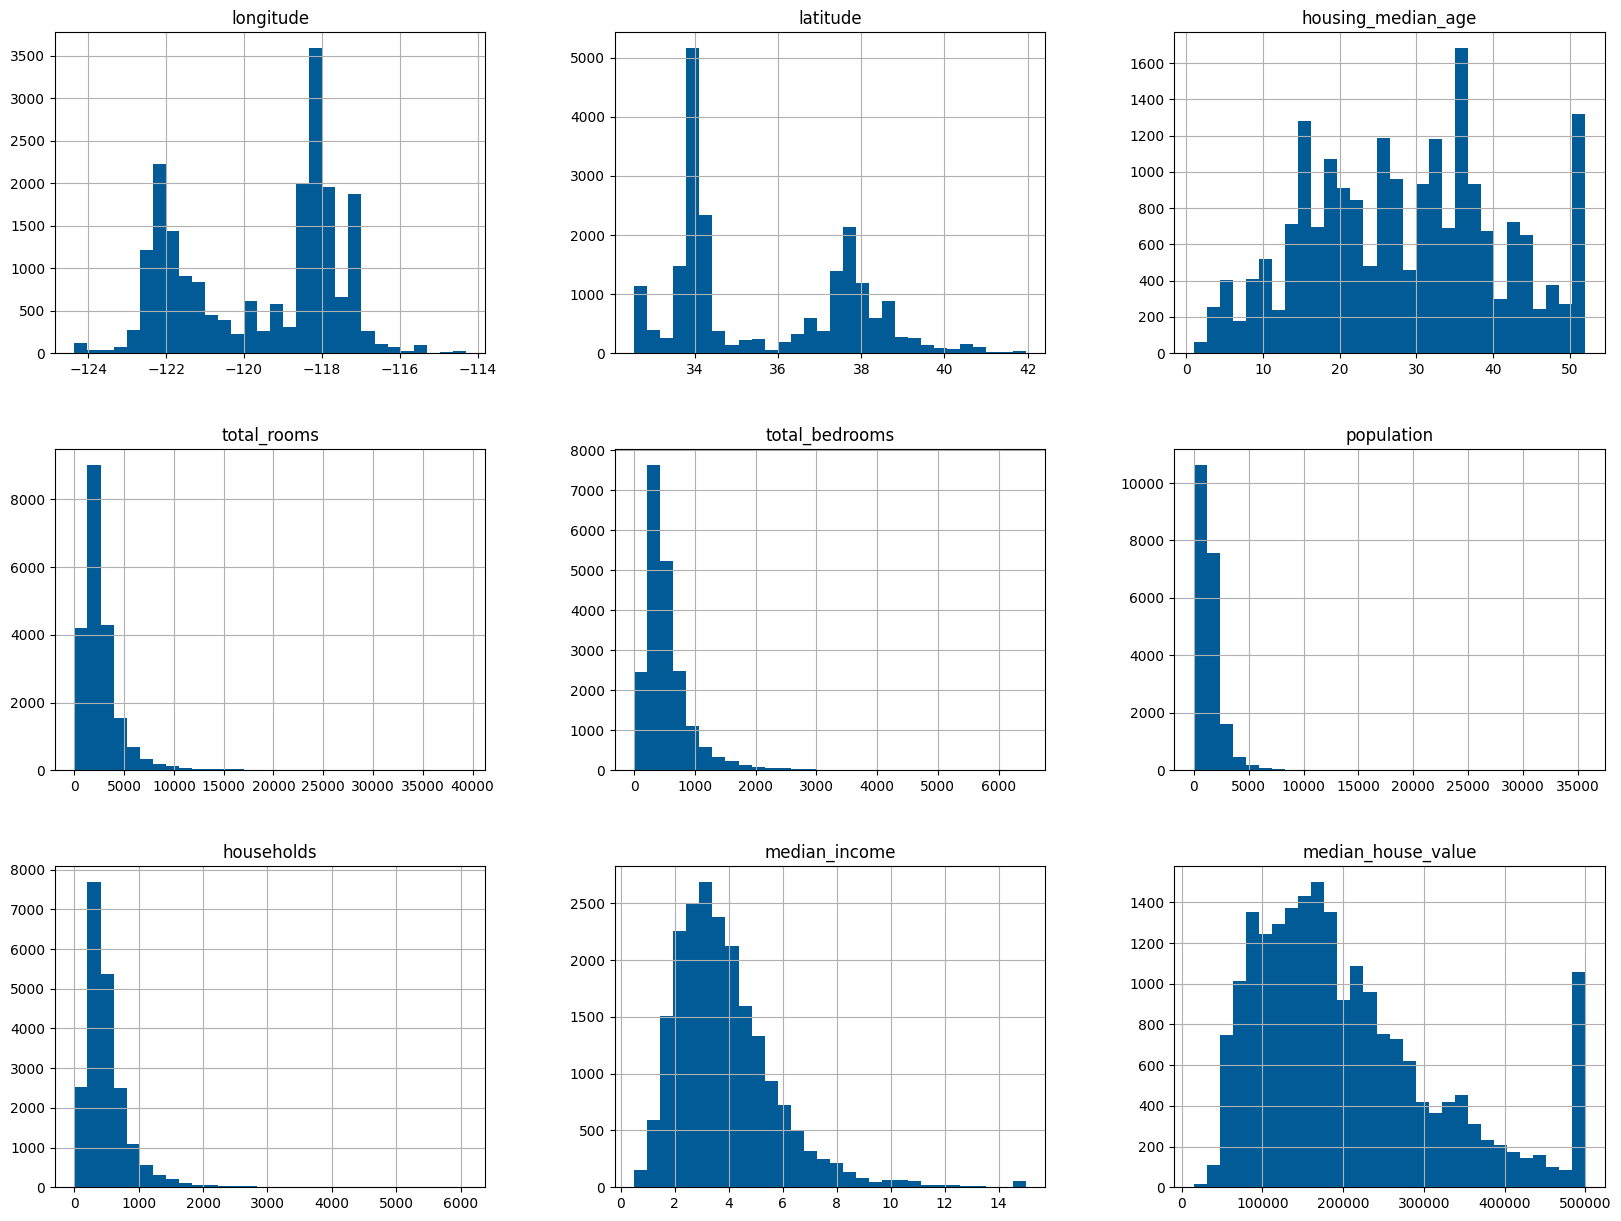

In [ ]:
df.hist(bins = 30, figsize=(20, 15), color = '#005b96');

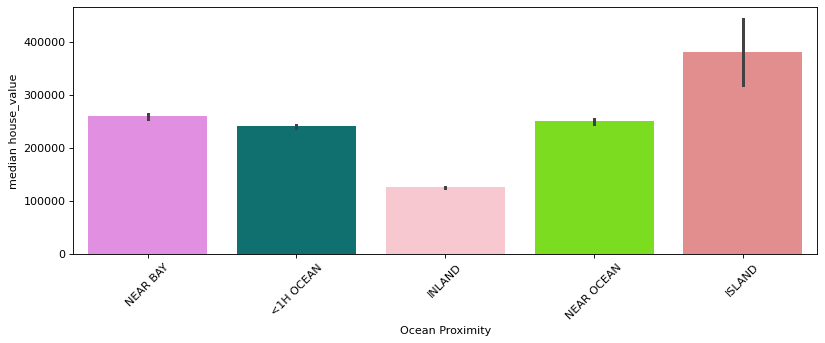

In [ ]:
plt.figure(figsize = (12,4),dpi=80)
sns.barplot(x = 'ocean_proximity', y = 'median_house_value', data = df, palette = ['violet', 'teal', 'pink','lawngreen','lightcoral'])
plt.xlabel('Ocean Proximity')
plt.ylabel('median house_value')
plt.xticks(rotation=45)
plt.show()

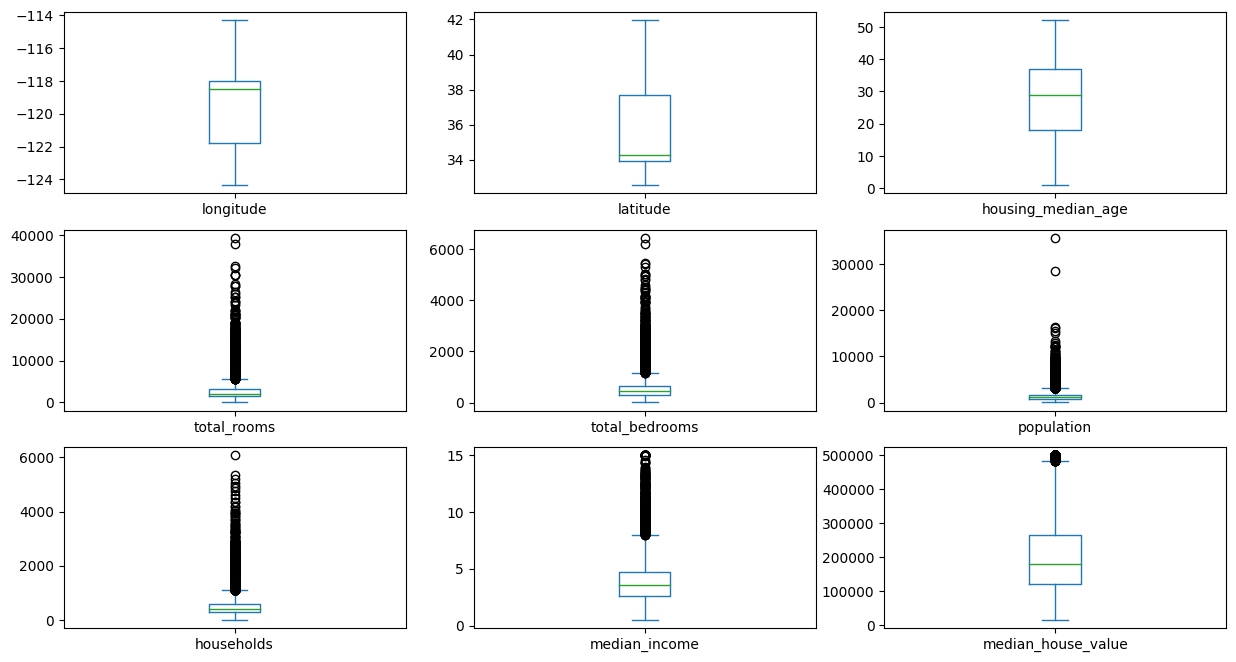

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,8))
plt.show()



*   **preprocessing**

---






In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
new_df = df.fillna(value=np.mean(df))

In [ ]:
pd.isna(new_df).sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_df = new_df.copy()
label_df["ocean_proximity"]=le.fit_transform(label_df["ocean_proximity"])
label_df.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [ ]:
data = label_df[~(label_df['population'] >= 20000)]
data = label_df[~(label_df['total_bedrooms'] >= 6000)]
data = label_df[~(label_df['households'] >= 6000)]
data = label_df[~(label_df['total_rooms'] >= 30000)]
print(np.shape(data))

(20633, 10)


In [ ]:
data.duplicated().sum()

0



*   Model Dataset & Evaluation


---





In [ ]:
X = data.drop(["median_house_value"],axis =1)
y = data.median_house_value

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

from sklearn.preprocessing import StandardScaler
STD = StandardScaler()
X_train = STD.fit_transform(X_train)
X_test = STD.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=5)

linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)

print(np.mean(scores),r2)

0.5807354303301839 0.6417911170281208


In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.01)
ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)
r2_score(y_test,y_pred)


0.6417911460712649

In [ ]:
ridgereg.coef_

array([-86632.68777033, -91993.41628301,  14188.42749627, -14090.87184276,
        36142.33158028, -42811.98510592,  25774.84271677,  75542.61213863,
         -130.63271686])



*   Plot the learning curve


---




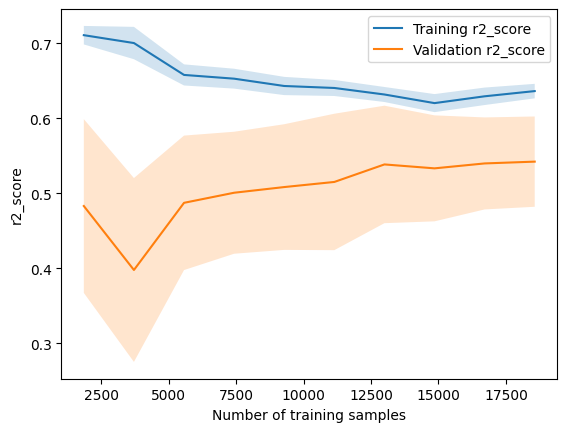

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    linreg, X, y, cv=10, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training r2_score')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation r2_score')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('r2_score')
plt.legend(loc='best')
plt.show()



*   Hyperparameters tuning

---





In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hyp_pars = {'alpha': [1e-4, 1e-3, 1e-2, 0.1]}
ridg = Ridge(alpha=0.01)
randomsearch = RandomizedSearchCV(ridg, hyp_pars, cv=10)
randomsearch.fit(X, y)
print(randomsearch.best_params_)
print(randomsearch.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': 0.0001}
0.5422462015987909
